In [2]:
%matplotlib inline

import sys
sys.path.append('../')

from agentsClasses.DQNClass import DQNAgent, DDQNAgent
from utilities.plots import create_grids, plot_trajectory
from utilities.jsonRW import writeJSON

In [2]:
#Hyperparameters
export_to_JSON = False  # write JSON file

NUM_DQN_AGENTS = 30     # number of DQN agents
NUM_DDQN_AGENTS = 30     # number of DDQN agents

NUM_NEURONS_FC1 = 128   # number of neurons for the first fully connected layer
NUM_NEURONS_FC2 = 128   # number of neurons for the second fully connected layer

SHAPE = "5x5"           # shape of the grid environment

episodes = [3000]
steps = [100,150]

EPS_START = 1.0         # epsilon start value
EPS_END = 0.01          # epsilon end value
EPS_DECAY = 0.996       # epsilon decay rate
#EPS_DECAY = EPS_START/(EPISODES_PER_AGENT/2)

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network

In [3]:
#CREATING AND TRAINING THE AGENTS
agents_arr = []

for n_episode in episodes:
    EPISODES_PER_AGENT = n_episode
    for n_steps in steps:
        MAX_STEPS_PER_EPISODE = n_steps
        print("Starting training with ", EPISODES_PER_AGENT, "episodes and ", MAX_STEPS_PER_EPISODE, "steps per episode")

        for i in range(NUM_DQN_AGENTS+NUM_DDQN_AGENTS):
            if i < NUM_DQN_AGENTS:
                print("DQN Agent", i+1,"/",NUM_DQN_AGENTS)    # if the agent is a DQN agent
                agent = DQNAgent(i, "DQN", SHAPE, NUM_NEURONS_FC1, NUM_NEURONS_FC2, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, EPS_START, EPS_END, EPS_DECAY, BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR, UPDATE_EVERY)
            else:
                print("DDQN Agent", i+1-NUM_DQN_AGENTS,"/",NUM_DDQN_AGENTS)  # if the agent is a DDQN agent 
                agent = DDQNAgent(i, "DDQN", SHAPE, NUM_NEURONS_FC1, NUM_NEURONS_FC2, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, EPS_START, EPS_END, EPS_DECAY, BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR, UPDATE_EVERY)

            agent.train()
            agents_arr.append(agent)

Starting training of 1 DQN agents and 0 DDQN agents
DQN Agent 1 / 1


100%|██████████| 1000/1000 [00:38<00:00, 25.76it/s]


La longitud estimada para el eje X del training error es: 399840.0
Agent 1 steps stats: 
  -Average: 24.99 
  -Std dev: 28.22 
   -Median: 10 
     -Best: 8


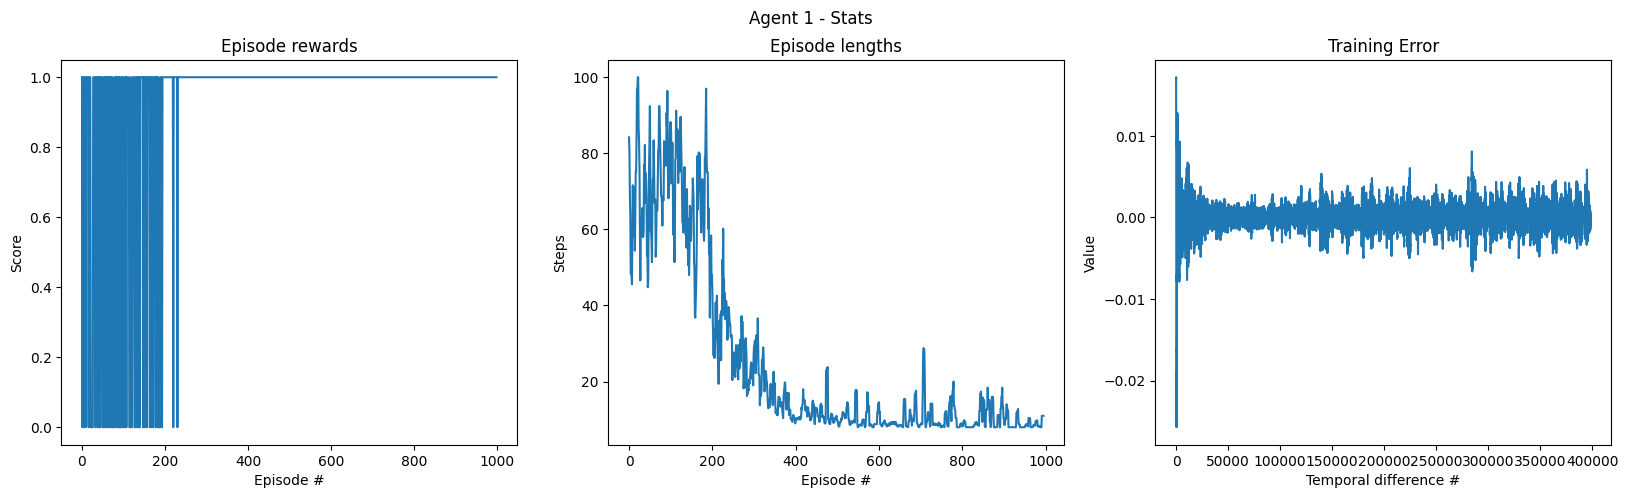

In [6]:
for agent in agents_arr:
    value_grid, policy_grid, string_policy_grid = create_grids(agent.env, Qnet=agent.qnetwork_local)
    start_pos = agent.env.unwrapped.start_pos

    if export_to_JSON:
        writeJSON(agent.algorithm, agent.n_episodes, agent.max_steps, agent.shape, start_pos, value_grid, policy_grid, string_policy_grid)